Este notebook fue realizado con el propósito de practicar y aplicar conocimientos fundamentales de análisis de datos utilizando Python, pandas y visualización de datos con Matplotlib.
El análisis se centra en un conjunto de datos relacionados con venta de vehículos, con el fin de explorar relaciones entre variables como precio, ventas, potencia del motor, eficiencia de combustible, entre otras.

Además de reforzar conceptos técnicos, este trabajo tiene como objetivo mostrar de forma clara y estructurada las habilidades que manejo actualmente, haciendo énfasis en la limpieza de datos, análisis exploratorio y visualización, todo dentro de un entorno de trabajo profesional.

In [2]:
#Importando librerias
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
#Importar el archivo 'Car_sales' para limpiarlo y analizarlo
df = pd.read_csv(r"C:\Users\Fabri\Downloads\Car_sales.csv")
df.head(10)

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
2,Acura,CL,14.114,18.225,Passenger,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,1/4/2012,NaN
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639
5,Audi,A6,18.780,23.555,Passenger,33.95,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,8/9/2011,84.565105
6,Audi,A8,1.380,39.000,Passenger,62.00,4.2,310.0,113.0,74.0,198.2,3.902,23.7,21.0,2/27/2012,134.656858
7,BMW,323i,19.747,NaN,Passenger,26.99,2.5,170.0,107.3,68.4,176.0,3.179,16.6,26.0,6/28/2011,71.191207
8,BMW,328i,9.231,28.675,Passenger,33.40,2.8,193.0,107.3,68.5,176.0,3.197,16.6,24.0,1/29/2012,81.877069
9,BMW,528i,17.527,36.125,Passenger,38.90,2.8,193.0,111.4,70.9,188.0,3.472,18.5,25.0,4/4/2011,83.998724


In [6]:
#Renombrar columnas con nombres limpios y tipos de datos correctos
df.rename(columns={'__year_resale_value':'year_resale_value'}, inplace = True)
df['Latest_Launch'] = pd.to_datetime(df['Latest_Launch'], errors = 'coerce')
df.columns
df.dtypes

Manufacturer                  object
Model                         object
Sales_in_thousands           float64
year_resale_value            float64
Vehicle_type                  object
Price_in_thousands           float64
Engine_size                  float64
Horsepower                   float64
Wheelbase                    float64
Width                        float64
Length                       float64
Curb_weight                  float64
Fuel_capacity                float64
Fuel_efficiency              float64
Latest_Launch         datetime64[ns]
Power_perf_factor            float64
dtype: object

In [8]:
#Verificar si hay valores nulos en las columnas
print(df.isnull().sum())

Manufacturer           0
Model                  0
Sales_in_thousands     0
year_resale_value     36
Vehicle_type           0
Price_in_thousands     2
Engine_size            1
Horsepower             1
Wheelbase              1
Width                  1
Length                 1
Curb_weight            2
Fuel_capacity          1
Fuel_efficiency        3
Latest_Launch          0
Power_perf_factor      2
dtype: int64


In [10]:
#Eliminar filas donde falte 'year_resale_value' o 'price_in_thousands'
df = df.dropna(subset = ['year_resale_value', 'Price_in_thousands'])

#Rellenar con mediana los pocos nulos restantes en otras columnas numéricas
cols_fill_median = ['Engine_size', 'Horsepower', 'Wheelbase', 'Width', 'Length', 'Curb_weight', 'Fuel_capacity', 'Fuel_efficiency', 'Power_perf_factor']

for col in cols_fill_median:
    median_val = df[col].median()
    df[col] = df[col].fillna(median_val)

#Confirmar que no quedaron nulos
print(df.isnull().sum())

Manufacturer          0
Model                 0
Sales_in_thousands    0
year_resale_value     0
Vehicle_type          0
Price_in_thousands    0
Engine_size           0
Horsepower            0
Wheelbase             0
Width                 0
Length                0
Curb_weight           0
Fuel_capacity         0
Fuel_efficiency       0
Latest_Launch         0
Power_perf_factor     0
dtype: int64


In [12]:
df.describe()

,Sales_in_thousands,year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
count,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119,119.000000
mean,58.992538,18.059370,26.095882,3.058824,182.243697,107.415126,71.251261,187.963866,3.325580,17.811765,24.100840,2011-12-04 10:53:26.722689024,75.322442
min,0.110000,5.160000,9.235000,1.000000,55.000000,92.600000,62.600000,149.400000,1.895000,10.300000,15.000000,2008-02-13 00:00:00,23.276272
25%,16.355000,11.250000,17.007500,2.250000,140.000000,102.500000,68.500000,177.550000,2.921500,15.500000,22.000000,2011-07-27 12:00:00,55.896573
50%,32.299000,14.010000,21.975000,3.000000,175.000000,107.000000,70.500000,188.000000,3.341000,17.200000,24.000000,2011-12-20 00:00:00,71.135292
75%,76.031500,19.882500,30.237500,3.800000,210.000000,111.900000,73.800000,196.650000,3.800500,19.650000,26.000000,2012-05-11 00:00:00,85.889076
max,540.561000,67.550000,82.600000,8.000000,450.000000,138.700000,79.300000,224.500000,5.115000,32.000000,45.000000,2012-12-29 00:00:00,188.144323
std,74.573581,11.549233,14.135356,1.056330,58.753286,8.011217,3.531909,13.862464,0.592289,3.763590,4.371314,NaN,25.828280


In [14]:
#Promedio de ventas por marcas
ventas_por_marca = df.groupby('Manufacturer')['Sales_in_thousands'].mean().sort_values(ascending=False)
print(ventas_por_marca)

Manufacturer
Ford          184.696500
Honda         118.534800
Jeep           97.717667
Toyota         84.385750
Dodge          80.882600
Pontiac        66.192400
Buick          60.504750
Nissan         56.094400
Chevrolet      55.796250
Hyundai        45.775333
Mercury        39.666500
Saturn         36.796333
Volkswagen     31.949800
Lincoln        31.354500
Mitsubishi     25.842143
Cadillac       24.348250
Infiniti       23.713000
Chrysler       23.509000
Acura          21.630333
Plymouth       20.709667
Mercedes-B     16.519750
Oldsmobile     15.045000
Lexus          14.381667
Audi           13.519000
BMW            13.379000
Porsche         4.042667
Name: Sales_in_thousands, dtype: float64


Aqui se muestra el promedio de ventas (en miles de unidades) por marca de vehículo.
Los datos indican que Ford lidera ampliamente en ventas, seguido por Honda, Jeep y Toyota, lo cual sugiere una alta popularidad y preferencia del mercado por estas marcas.

Por otro lado, marcas como Porsche, BMW y Audi presentan menores volúmenes de ventas, lo que podría deberse a su posicionamiento en segmentos más exclusivos o de lujo.

Esta comparación nos permite tener una idea general sobre qué marcas tienen mayor aceptación o demanda en el mercado, al menos dentro del contexto de este conjunto de datos.



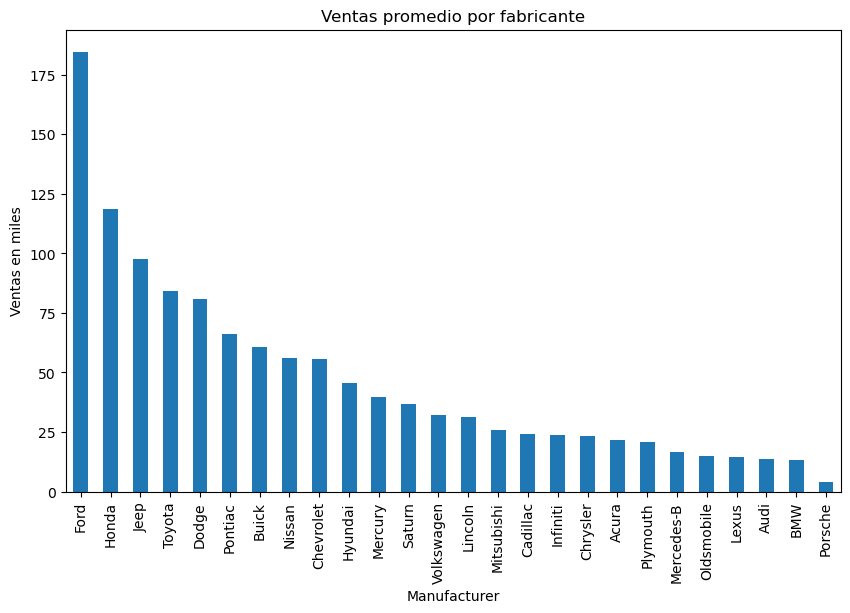

In [17]:
#Ventas por fabricante 
ventas_por_marca.plot(kind='bar', figsize=(10, 6), title = 'Ventas promedio por fabricante')
plt.ylabel('Ventas en miles')
plt.show()

El gráfico evidencia claramente la gran diferencia en volumen de ventas entre Ford y el resto de las marcas.
Esto sugiere una fuerte preferencia del público por Ford, probablemente debido a factores como su accesibilidad económica, amplia disponibilidad en el mercado y reputación en confiabilidad.
La distancia en las ventas también refleja cómo otras marcas, aunque populares, no alcanzan el mismo nivel de penetración o presencia en el mercado que Ford.

In [20]:
#Ventas de ford por modelo
ventas_por_modelo = df[df['Manufacturer']=='Ford'].groupby('Model')['Sales_in_thousands'].mean().sort_values(ascending=False)
print(ventas_por_modelo)

Model
F-Series          540.561
Explorer          276.747
Taurus            245.815
Ranger            220.650
Windstar          155.787
Expedition        125.338
Mustang           113.369
Escort             70.227
Crown Victoria     63.403
Contour            35.068
Name: Sales_in_thousands, dtype: float64


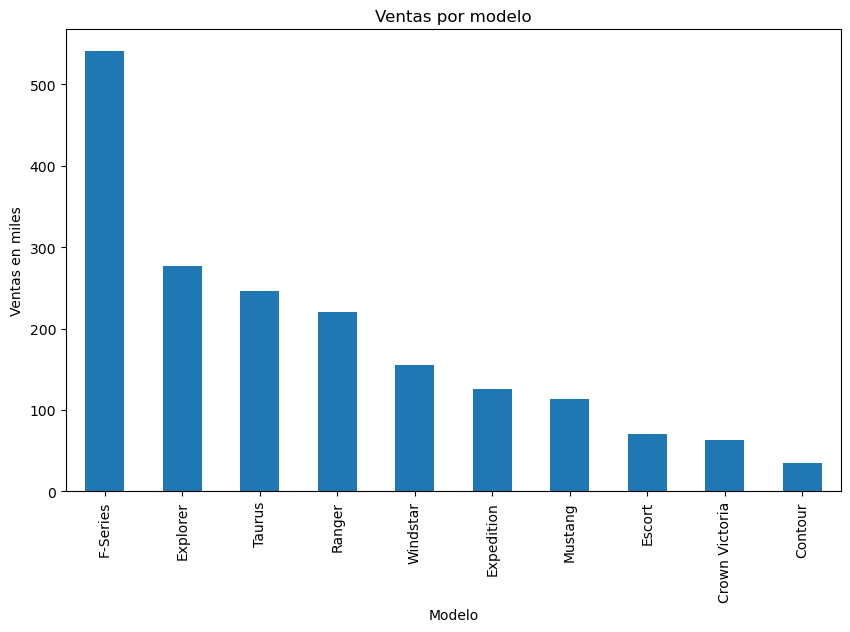

In [22]:
ventas_por_modelo.plot(kind='bar', figsize=(10,6), title='Ventas por modelo')
plt.xlabel('Modelo')
plt.ylabel('Ventas en miles')
plt.show()

En este gráfico se observa con mayor claridad cuál es el modelo de Ford con más ventas. Destaca el modelo F-Series, que supera ampliamente al resto en términos de unidades vendidas. Esto indica una fuerte preferencia del mercado por este modelo en particular, probablemente debido a su versatilidad, reputación y adecuación para diferentes tipos de uso, como trabajo o transporte personal.

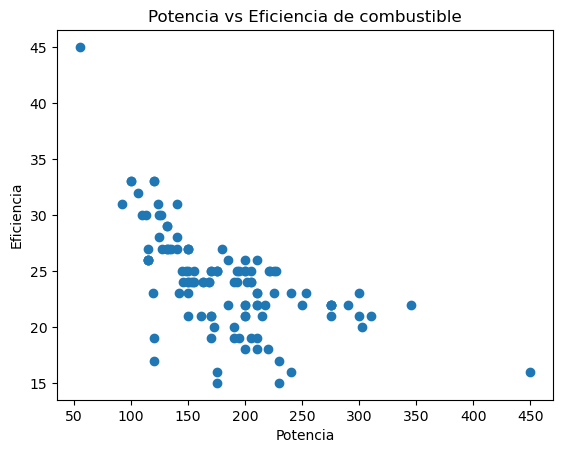

In [25]:
#Relacion entre potencia y eficiencia
plt.scatter(df['Horsepower'], df['Fuel_efficiency'])
plt.xlabel('Potencia')
plt.ylabel('Eficiencia')
plt.title('Potencia vs Eficiencia de combustible')
plt.show()

Según el gráfico, se observa una tendencia común: a mayor potencia del vehículo, la eficiencia del combustible tiende a reducirse considerablemente en comparación con vehículos de menor potencia. Aunque existen algunos casos en que vehículos más potentes superan ligeramente en eficiencia a otros modelos más ligeros, en general, el consumo es mayor en los motores más potentes.

Esta relación inversa es esperable, ya que motores más potentes suelen consumir más combustible para entregar mayor rendimiento, lo que afecta la eficiencia general del vehículo.

In [27]:
#Relaciones
corr = df[['Price_in_thousands', 'Horsepower', 'Engine_size', 'Fuel_efficiency', 'Sales_in_thousands']].corr()
print(corr)

                    Price_in_thousands  Horsepower  Engine_size  \
Price_in_thousands            1.000000    0.854350     0.655006   
Horsepower                    0.854350    1.000000     0.862466   
Engine_size                   0.655006    0.862466     1.000000   
Fuel_efficiency              -0.480752   -0.595130    -0.723118   
Sales_in_thousands           -0.256515   -0.157153     0.029394   

                    Fuel_efficiency  Sales_in_thousands  
Price_in_thousands        -0.480752           -0.256515  
Horsepower                -0.595130           -0.157153  
Engine_size               -0.723118            0.029394  
Fuel_efficiency            1.000000           -0.064442  
Sales_in_thousands        -0.064442            1.000000  


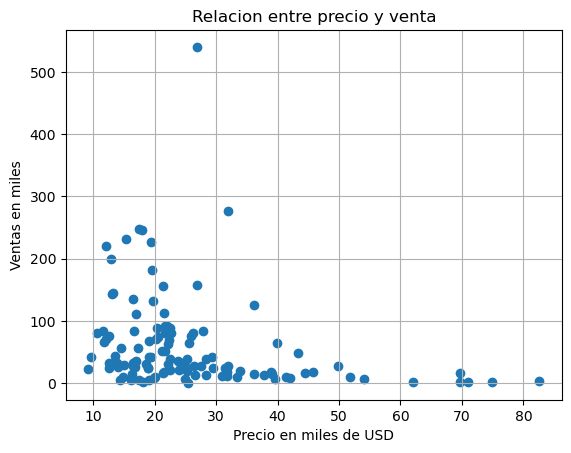

In [29]:
#Relacion Precio-Venta
plt.scatter(df['Price_in_thousands'], df['Sales_in_thousands'])
plt.xlabel('Precio en miles de USD')
plt.ylabel('Ventas en miles')
plt.title('Relacion entre precio y venta')
plt.grid(True)
plt.show()

Desde la perspectiva de la empresa, el análisis sugiere que el mercado valora no solo el precio bajo, sino también la relación costo-beneficio. Los vehículos con precios en el rango de 30 a 35 mil dólares, que ofrecen características y rendimiento superiores a los modelos más económicos, pueden resultar los más atractivos para los consumidores. Por tanto, la empresa debería enfocar sus esfuerzos en optimizar y promocionar modelos que ofrezcan ese equilibrio, maximizando así las ventas y la satisfacción del cliente.

En contraste, los modelos con precios superiores a los 50 mil dólares son los más exclusivos, presentan pocas ventas y, a largo plazo, podrían representar pérdidas para la empresa si no se manejan adecuadamente.

In [31]:
#Los 10 autos mas vendidos
top_autos = df.sort_values('Sales_in_thousands', ascending=False).head(10)
print(top_autos[['Manufacturer', 'Model', 'Sales_in_thousands']])

    Manufacturer           Model  Sales_in_thousands
56          Ford        F-Series             540.561
52          Ford        Explorer             276.747
137       Toyota           Camry             247.994
49          Ford          Taurus             245.815
58         Honda          Accord             230.902
40         Dodge      Ram Pickup             227.061
55          Ford          Ranger             220.650
57         Honda           Civic             199.685
45         Dodge         Caravan             181.749
69          Jeep  Grand Cherokee             157.040


Como se vio más arriba, el modelo F-Series de Ford presenta una gran ventaja en ventas comparado con el segundo lugar dentro de la misma marca, que es el Explorer.
A partir de ese puesto, la diferencia con otros modelos y fabricantes no es tan significativa, lo que resalta aún más la fuerte preferencia del mercado por el F-Series.

Este dato subraya la importancia estratégica de este modelo para Ford y su posicionamiento en el mercado de vehículos.

In [33]:
#Precio Promedio por fabricante
precio_promedio = df.groupby('Manufacturer')['Price_in_thousands'].mean().sort_values(ascending=False)
print(precio_promedio)

Manufacturer
Porsche       62.473333
Mercedes-B    58.487500
Lincoln       41.205000
Lexus         41.105000
Audi          39.980000
Cadillac      38.761250
BMW           36.150000
Acura         30.633333
Infiniti      29.465000
Oldsmobile    27.829250
Buick         26.781250
Dodge         24.004000
Nissan        23.167200
Pontiac       22.412000
Chrysler      22.280000
Mitsubishi    22.167429
Toyota        21.934750
Ford          21.920500
Jeep          20.991667
Mercury       20.748333
Honda         20.277000
Chevrolet     20.164375
Volkswagen    18.058000
Plymouth      15.856667
Saturn        12.503333
Hyundai       12.165667
Name: Price_in_thousands, dtype: float64


La fuerte demanda de Ford puede explicarse en parte por su estrategia de precio y calidad.
Aunque el precio promedio de Ford no es el más bajo —alrededor de 21.9 mil dólares—, se posiciona en un rango accesible comparado con otras marcas más caras como Porsche, Mercedes o Lexus.

Esta combinación de calidad-precio hace que los consumidores perciban un buen equilibrio entre el costo, la potencia y el rendimiento del vehículo. Así, Ford logra atraer a un amplio segmento de compradores que buscan beneficios que superan el precio de fabricación.

En contraste, marcas con precios promedio más altos, como Porsche (62.47 mil dólares) o Mercedes (58.48 mil dólares), apuntan a mercados más exclusivos, con menor volumen de ventas pero mayor margen por unidad.

In [38]:
#Los 10 autos mas eficientes en combustible
autos_eficientes = df.sort_values('Fuel_efficiency', ascending= False).head(10)
print(autos_eficientes[['Manufacturer', 'Model', 'Price_in_thousands', 'Fuel_efficiency',]])

    Manufacturer    Model  Price_in_thousands  Fuel_efficiency
26     Chevrolet    Metro               9.235             45.0
25     Chevrolet    Prizm              13.960             33.0
136       Toyota  Corolla              13.108             33.0
130       Saturn       SC              12.535             33.0
129       Saturn       SL              10.685             33.0
57         Honda    Civic              12.885             32.0
62       Hyundai   Accent               9.699             31.0
139       Toyota   Celica              16.875             31.0
131       Saturn       SW              14.290             31.0
46          Ford   Escort              12.070             30.0


El Chevrolet Metro es el vehículo más eficiente en términos de consumo de combustible dentro del conjunto de datos.
La ausencia del modelo Ford F-Series en esta lista puede explicarse porque el Metro está claramente enfocado en maximizar la eficiencia del combustible, posiblemente sacrificando aspectos como la potencia y el rendimiento equilibrado que caracterizan a otros modelos.

Esta especialización en eficiencia podría ser una de las razones por las cuales el Chevrolet Metro no alcanza niveles altos de ventas comparado con modelos más equilibrados, que combinan mejor potencia y eficiencia, y que suelen ser preferidos por un segmento más amplio de consumidores.

Manufacturer  Model  
Chevrolet     Metro      45.0
              Prizm      33.0
Toyota        Corolla    33.0
Saturn        SL         33.0
              SC         33.0
Honda         Civic      32.0
Toyota        Celica     31.0
Saturn        SW         31.0
Hyundai       Accent     31.0
Mitsubishi    Mirage     30.0
Name: Fuel_efficiency, dtype: float64


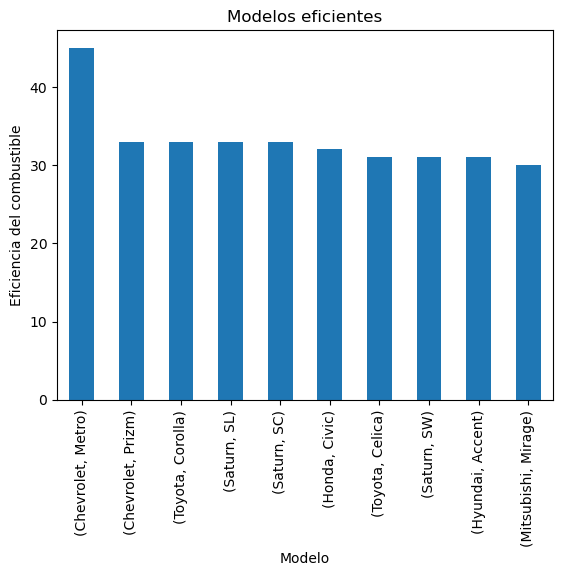

In [49]:
#Grafico de modelos eficientes
modelos_eficientes = df.groupby(['Manufacturer','Model'])['Fuel_efficiency'].mean().sort_values(ascending=False)
print(modelos_eficientes.head(10))
modelos_eficientes.head(10).plot(kind='bar', title='Modelos eficientes')
plt.xlabel('Modelo')
plt.ylabel('Eficiencia del combustible')
plt.show()

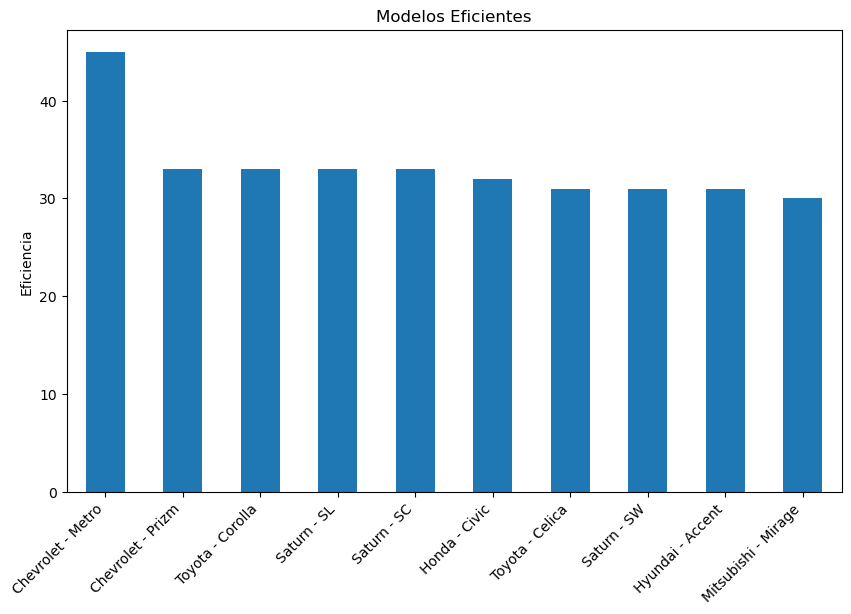

In [51]:
#Grafico ajustado y mas legible
top10 = modelos_eficientes.head(10).reset_index()
top10_labels = top10['Manufacturer'] + ' - ' + top10['Model']

top10.set_index(top10_labels, inplace=True)

top10['Fuel_efficiency'].plot(kind='bar', title='Modelos Eficientes', figsize=(10,6))
plt.ylabel('Eficiencia')
plt.xticks(rotation=45, ha='right')
plt.show()

El gráfico muestra claramente que los modelos con mayor eficiencia en consumo de combustible, como el Chevrolet Metro, se destacan por sus altos valores de eficiencia. Esto confirma que estos vehículos están optimizados para bajo consumo, lo que se refleja en su posición sobresaliente en la gráfica.

Sin embargo, la ausencia de modelos como el Ford F-Series en esta lista visual resalta que, aunque algunos vehículos priorizan la eficiencia, otros buscan un equilibrio diferente entre potencia y consumo. Esto explica por qué vehículos altamente eficientes no siempre dominan en ventas, ya que los consumidores valoran también la potencia y otras características que no están directamente relacionadas con la eficiencia.

En resumen, la gráfica refuerza la idea de que la eficiencia es un factor importante pero no único en la preferencia del consumidor, que busca un balance entre varios atributos del vehículo.

Vehicle_type
Passenger    26.740033
Car          24.096793


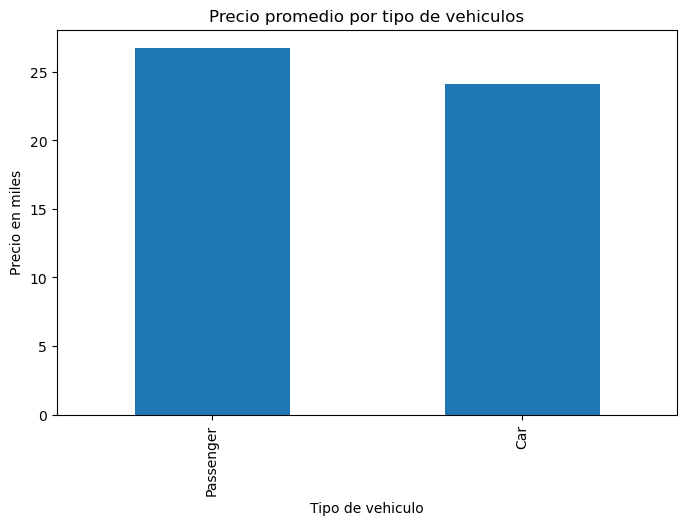

In [54]:
#precios promedios por tipo de vehiculo
price_per_type = df.groupby('Vehicle_type')['Price_in_thousands'].mean().sort_values(ascending = False)
print(price_per_type.to_string())

price_per_type.plot(kind='bar', title = 'Precio promedio por tipo de vehiculos', ylabel = 'Precio en miles', xlabel = 'Tipo de vehiculo', figsize = (8, 5))
plt.show()

El análisis de ventas por tipo de vehículo muestra que los vehículos clasificados como "Passenger" tienen un precio promedio ligeramente mayor (26.74 mil dólares) en comparación con los clasificados simplemente como "Car" (24.10 mil dólares).

Esto sugiere que los vehículos para pasajeros suelen ser más costosos en promedio, lo que podría estar relacionado con características adicionales, tamaño o tecnología incorporada. Esta diferencia en precio puede influir en las preferencias y decisiones de compra de los consumidores según el tipo de uso que le den al vehículo.

Vehicle_type
Passenger    25.422222
Car          20.000000


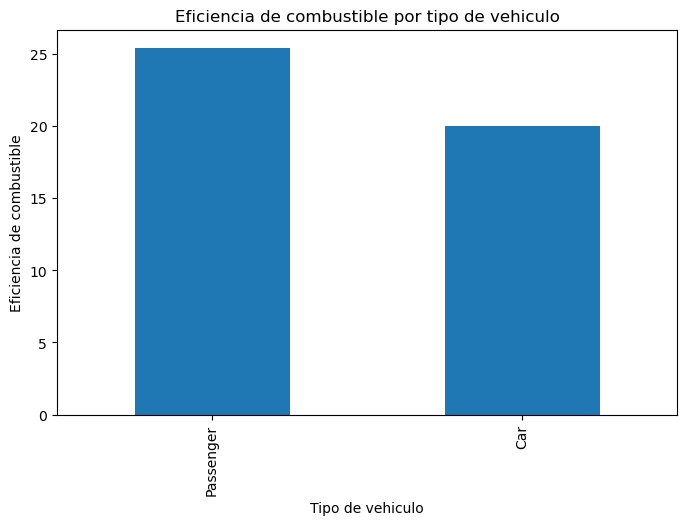

In [58]:
#Eficiencia de combustible por tipo de vehiculo
efficency_per_type = df.groupby('Vehicle_type')['Fuel_efficiency'].mean().sort_values(ascending=False)
print(efficency_per_type.to_string())
efficency_per_type.plot(kind='bar', title = 'Eficiencia de combustible por tipo de vehiculo', ylabel = 'Eficiencia de combustible', xlabel = 'Tipo de vehiculo', figsize=(8, 5))
plt.show()

El análisis de eficiencia de combustible por tipo de vehículo muestra que los vehículos clasificados como "Passenger" tienen una eficiencia de combustible promedio de 25.42, mientras que los clasificados como "Car" tienen una eficiencia promedio menor, de 20.00 .

Esto indica que, en promedio, los vehículos para pasajeros son más eficientes en el consumo de combustible que los autos estándar, lo cual podría deberse a diferencias en diseño, tecnología o peso.

                 Curb_weight  Fuel_efficiency
Curb_weight          1.00000         -0.81791
Fuel_efficiency     -0.81791          1.00000


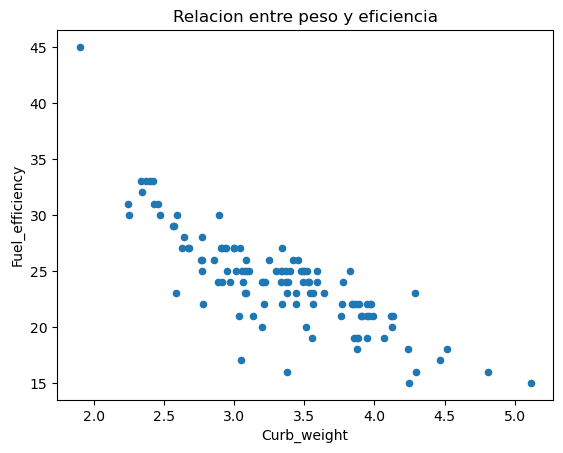

In [60]:
#Relacion entre peso del vehiculo y eficiencia de combustible
print(df[['Curb_weight', 'Fuel_efficiency']].corr())
df.plot.scatter(x='Curb_weight', y='Fuel_efficiency', title='Relacion entre peso y eficiencia')
plt.show()

La correlación entre el peso del vehículo (Curb_weight) y la eficiencia del combustible (Fuel_efficiency) es negativa, con un valor de -0.82. Esto indica que, en general, a medida que aumenta el peso del vehículo, la eficiencia del combustible disminuye considerablemente.

Este resultado es esperado, ya que vehículos más pesados requieren más energía para moverse, lo que se traduce en un mayor consumo de combustible.

                    Price_in_thousands  Horsepower
Price_in_thousands             1.00000     0.85435
Horsepower                     0.85435     1.00000


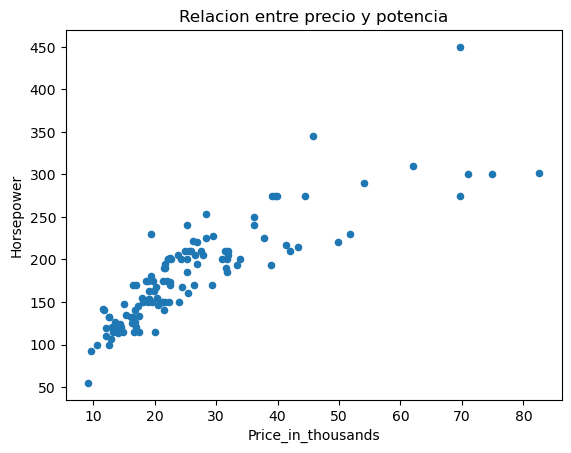

In [62]:
#Relacion entre el precio del vehiculo y la potencia
print(df[['Price_in_thousands', 'Horsepower']].corr())
df.plot.scatter(x='Price_in_thousands', y='Horsepower', title='Relacion entre precio y potencia')
plt.show()

Relación entre precio y potencia del vehículo

El análisis muestra una alta correlación positiva (0.85) entre el precio y la potencia (horsepower) del vehículo. Esto indica que, generalmente, a mayor precio, mayor es la potencia del motor.

Esta relación es esperable porque un vehículo con un motor más avanzado o moderno, que soporta mayores exigencias y temperaturas, suele tener componentes de mejor calidad, lo que incrementa su costo. Por lo tanto, el precio refleja en buena medida la calidad interna y el rendimiento del vehículo.

                 Engine_size  Fuel_efficiency
Engine_size         1.000000        -0.723118
Fuel_efficiency    -0.723118         1.000000


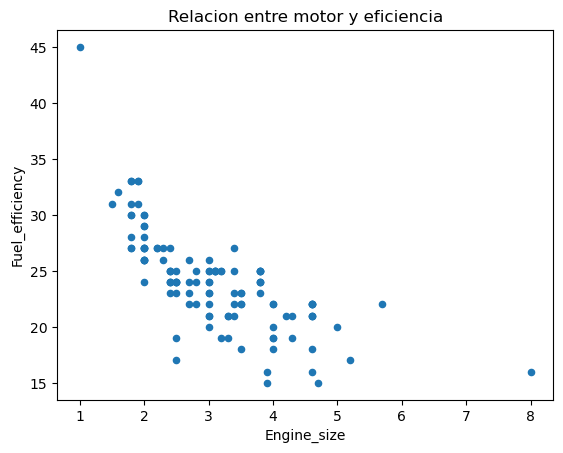

In [64]:
#Relacion entre tamaño de motor y eficiencia del combustible
print(df[['Engine_size', 'Fuel_efficiency']].corr())
df.plot.scatter(x='Engine_size', y='Fuel_efficiency', title='Relacion entre motor y eficiencia')
plt.show()

La correlación negativa de -0.72 entre el tamaño del motor (Engine_size) y la eficiencia del combustible indica que, en general, a medida que el motor es más grande, el consumo de combustible aumenta, reduciendo la eficiencia.

Esto puede explicarse porque motores más grandes requieren más energía para operar, lo que genera mayor consumo, además de factores como sobrecalentamiento o un gasto extra al acelerar.

Por lo tanto, vehículos con motores más pequeños tienden a ser más eficientes en combustible, aunque esto también puede implicar menor potencia.